In [1]:
import math
import h5py
import sys
import numpy as np
import dataset
import matplotlib
from matplotlib import pyplot as plt
from operator import itemgetter
from matplotlib.ticker import LogLocator, AutoLocator
%matplotlib notebook

matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['font.serif'] = ['Utopia']
matplotlib.rcParams.update({'font.size': 16})
np.set_printoptions(threshold=sys.maxsize)

plt.style.use('science')

In [2]:
title = 'Tetra'

Latticesizes =[24]
if (len(Latticesizes)==1):
    Latticesizes[0]=title

for i in range(len(Latticesizes)):
	title = str(Latticesizes[i])
	f = h5py.File('%s.out.h5' %title,'r')
    
	L=np.intc(f['/parameters/L'])
	lat_sites = 4*L*L*L
	Npoints = np.intc(f['/parameters/N_replica'])
    
	Nmeas = np.intc(f['simulation/results/0/Energy/count'])
    
	NBins_MUCA = np.intc(f['/parameters/NBins_muca']) + 2
	NBins = np.intc(f['/parameters/NBins']) + 1

	g=np.zeros((Npoints,NBins_MUCA))
	w=np.zeros((Npoints,NBins_MUCA))  ## w is to reweight the datapoints, unlike 'weight' which is for Histograms
    
	E_histmat = np.zeros((Npoints,NBins))
	DE_histmat = E_histmat 
	T = np.zeros(Npoints)
    
	c = np.zeros(Npoints)         ##normalization terms needed to find the correct terms, found through histograms
    
	E_t = np.zeros((Npoints,Nmeas))
	Q_t = np.zeros((Npoints,Nmeas))
	w_t = np.zeros((Npoints,Nmeas))   # Define matrix to keep track of the weight associated to each measurement



In [3]:
	## Fetch Data
	for q in range(Npoints):
		if (q==0):
			f_q = h5py.File('%s.clone.h5' %title,'r')
		if (q>0):
			f_q = h5py.File('%s.clone.h5.%s' %(title,q),'r')
		E_histmat[q,:] = np.array( f['/simulation/results/%s/Energy_Hist/mean/value' %q] )
		g[q,:] =  np.array(f_q['/simulation/realizations/0/clones/0/checkpoint/g'])
		w[q,:] = np.exp(g[q,:] - np.max(g[q,:]))

		E_t[q,:] = np.array(f_q['/simulation/realizations/0/clones/0/checkpoint/E_timeseries'])
		Q_t[q,:] = np.array(f_q['/simulation/realizations/0/clones/0/checkpoint/Q_timeseries'])
		w_t[q,:] = np.array(f_q['/simulation/realizations/0/clones/0/checkpoint/w_timeseries'])

		T[q] = np.array(f_q['/simulation/realizations/0/clones/0/checkpoint/temp'])
	DE_histmat = np.sqrt(E_histmat/Nmeas)


Retrieving the energy intervals used for the MUCA sampling
Reweighting E_histograms to the correct g in order to find renormalizing factor
0.0 0.0 1855.99999944 18.239359276538625
8.0 0.0 1855.99999944 18.239359276538625
16.0 0.0 1855.99999944 18.239359276538625
24.0 0.0 1855.99999944 18.239359276538625
32.0 0.0 1855.99999944 18.239359276538625
40.0 0.0 1855.99999944 18.239359276538625
48.0 0.0 1855.99999944 18.239359276538625
56.0 0.0 1855.99999944 18.239359276538625
64.0 0.0 1855.99999944 18.239359276538625
72.0 0.0 1855.99999944 18.239359276538625
80.0 0.0 1855.99999944 18.239359276538625
88.0 0.0 1855.99999944 18.239359276538625
96.0 0.0 1855.99999944 18.239359276538625
104.0 0.0 1855.99999944 18.239359276538625
112.0 0.0 1855.99999944 18.239359276538625
120.0 0.0 1855.99999944 18.239359276538625
128.0 0.0 1855.99999944 18.239359276538625
136.0 0.0 1855.99999944 18.239359276538625
144.0 0.0 1855.99999944 18.239359276538625
152.0 0.0 1855.99999944 18.239359276538625
160.0 0.0 1855.9

/var/folders/qw/twk_02890kjbj96rtxbtgzzm0000gq/T/ipykernel_57846/302096364.py:18: RuntimeWarning: divide by zero encountered in log
  E_histogram_log=np.log(E_histogram)


<IPython.core.display.Javascript object>


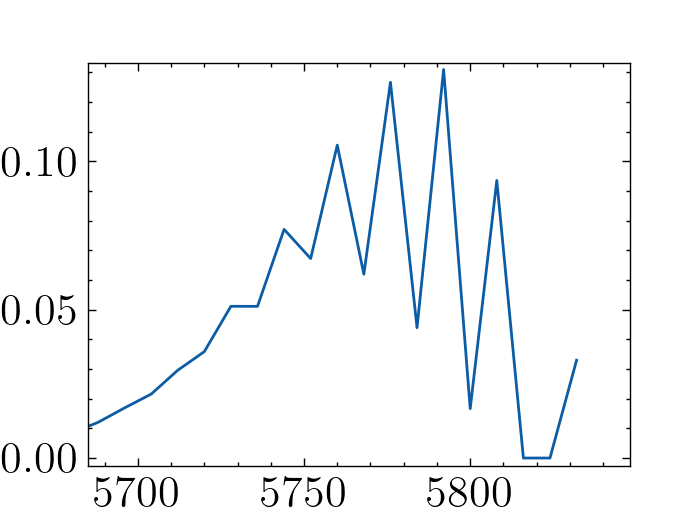

0.0 17.17990864615397
8.0 17.17990864615397
16.0 17.17990864615397
24.0 17.17990864615397
32.0 17.17990864615397
40.0 17.17990864615397
48.0 17.17990864615397
56.0 17.17990864615397
64.0 17.17990864615397
72.0 17.17990864615397
80.0 17.17990864615397
88.0 17.17990864615397
96.0 17.17990864615397
104.0 17.17990864615397
112.0 17.17990864615397
120.0 17.17990864615397
128.0 17.17990864615397
136.0 17.17990864615397
144.0 17.17990864615397
152.0 17.17990864615397
160.0 17.17990864615397
168.0 17.17990864615397
176.0 17.17990864615397
184.0 17.17990864615397
192.0 17.17990864615397
200.0 17.17990864615397
208.0 17.17990864615397
216.0 17.17990864615397
224.0 17.17990864615397
232.0 17.17990864615397
240.0 17.17990864615397
248.0 17.17990864615397
256.0 17.17990864615397
264.0 17.17990864615397
272.0 17.17990864615397
280.0 17.17990864615397
288.0 17.17990864615397
296.0 17.17990864615397
304.0 17.17990864615397
312.0 17.17990864615397
320.0 17.17990864615397
328.0 17.17990864615397
336.0 1

0.0 0.0 1855.99999944 12.969672056022159
8.0 0.0 1855.99999944 12.969672056022159
16.0 0.0 1855.99999944 12.969672056022159
24.0 0.0 1855.99999944 12.969672056022159
32.0 0.0 1855.99999944 12.969672056022159
40.0 0.0 1855.99999944 12.969672056022159
48.0 0.0 1855.99999944 12.969672056022159
56.0 0.0 1855.99999944 12.969672056022159
64.0 0.0 1855.99999944 12.969672056022159
72.0 0.0 1855.99999944 12.969672056022159
80.0 0.0 1855.99999944 12.969672056022159
88.0 0.0 1855.99999944 12.969672056022159
96.0 0.0 1855.99999944 12.969672056022159
104.0 0.0 1855.99999944 12.969672056022159
112.0 0.0 1855.99999944 12.969672056022159
120.0 0.0 1855.99999944 12.969672056022159
128.0 0.0 1855.99999944 12.969672056022159
136.0 0.0 1855.99999944 12.969672056022159
144.0 0.0 1855.99999944 12.969672056022159
152.0 0.0 1855.99999944 12.969672056022159
160.0 0.0 1855.99999944 12.969672056022159
168.0 0.0 1855.99999944 12.969672056022159
176.0 0.0 1855.99999944 12.969672056022159
184.0 0.0 1855.99999944 12

3152.0 3151.999999622535 3159.999999623662 1.1665203801680528
3160.0 3159.999999623662 3167.999999624789 0.5062041418729386
3168.0 3167.999999624789 3175.9999996259157 -0.14840892542217432
3176.0 3175.9999996259157 3183.999999627042 -0.8324386377172885
3184.0 3183.999999627042 3191.999999628169 -1.439564123012401
3192.0 3191.999999628169 3199.999999629296 -2.0504104303075135
3200.0 3199.999999629296 3207.9999996304223 -2.646651947602626
3208.0 3207.9999996304223 3215.999999631549 -3.2403396348977402
3216.0 3215.999999631549 3223.999999632676 -3.8126255421928548
3224.0 3223.999999632676 3231.999999633803 -4.342856429487966
3232.0 3231.999999633803 3239.9999996349297 -4.831663676783082
3240.0 3239.9999996349297 3247.9999996360566 -5.339808494078193
3248.0 3247.9999996360566 3255.9999996371835 -5.830520491373305
3256.0 3255.9999996371835 3263.99999963831 -6.28677471866842
3264.0 3263.99999963831 3271.9999996394363 -6.739715495963532
3272.0 3271.9999996394363 3279.999999640563 -7.206358103

5176.0 5175.999999907605 5183.999999908732 16.34343442819911
5184.0 5183.999999908732 5191.999999909859 16.86350151781984
5192.0 5191.999999909859 5199.999999910986 17.37807863044057
5200.0 5199.999999910986 5207.999999912113 17.894277682061293
5208.0 5207.999999912113 5215.99999991324 18.423056049682017
5216.0 5215.99999991324 5223.999999914366 18.937793148302745
5224.0 5223.999999914366 5231.999999915493 19.46867907792347
5232.0 5231.999999915493 5239.999999916619 20.012759176544197
5240.0 5239.999999916619 5247.999999917747 20.52108763616492
5248.0 5247.999999917747 5255.999999918873 21.06900223678565
5256.0 5255.999999918873 5263.99999992 21.613853375406375
5264.0 5263.99999992 5271.999999921127 22.1635549780271
5272.0 5271.999999921127 5279.999999922254 22.702853045647828
5280.0 5279.999999922254 5287.9999999233805 23.258187236268554
5288.0 5287.9999999233805 5295.9999999245065 23.80322535488928
5296.0 5295.9999999245065 5303.999999925634 24.332384023510006
5304.0 5303.99999992563

5688.0 5687.999999979718 5695.999999980845 45.74590586180904
5696.0 5695.999999980845 5703.999999981972 46.06110279668743
5704.0 5703.999999981972 5711.999999983099 46.31526664156581
5712.0 5711.999999983099 5719.999999984226 46.595847716444204
5720.0 5719.999999984226 5727.999999985352 46.77323920132259
5728.0 5727.999999985352 5735.999999986479 47.04196768620097
5736.0 5735.999999986479 5743.999999987605 47.104798761079365
5744.0 5743.999999987605 5751.999999988732 47.42780714595774
5752.0 5751.999999988732 5759.999999989859 47.27638545083612
5760.0 5759.999999989859 5767.999999990986 47.701736425714515
5768.0 5767.999999990986 5775.999999992113 47.208756800592894
5776.0 5775.999999992113 5783.999999993239 47.82647236547129
5784.0 5783.999999993239 5791.999999994367 46.780166930349665
5792.0 5791.999999994367 5799.9999999954925 47.74925929522805
5800.0 5799.9999999954925 5807.99999999662 45.68369522010644
5808.0 5807.99999999662 5815.999999997746 47.35172327498482
5816.0 5815.9999999

4536.0 4535.999999817464 4543.999999818592 -17.425415714394678
4544.0 4543.999999818592 4551.999999819718 -17.199541370861535
4552.0 4551.999999819718 4559.999999820845 -16.971809897328395
4560.0 4559.999999820845 4567.999999821972 -16.771284093795256
4568.0 4567.999999821972 4575.999999823099 -16.500360190262118
4576.0 4575.999999823099 4583.999999824226 -16.275897556728975
4584.0 4583.999999824226 4591.999999825352 -16.057825023195832
4592.0 4591.999999825352 4599.999999826479 -15.781060309662692
4600.0 4599.999999826479 4607.999999827605 -15.542161466129555
4608.0 4607.999999827605 4615.999999828733 -15.314018822596413
4616.0 4615.999999828733 4623.999999829859 -15.022161199063273
4624.0 4623.999999829859 4631.999999830986 -14.77865303553013
4632.0 4631.999999830986 4639.999999832113 -14.515214791996993
4640.0 4639.999999832113 4647.999999833239 -14.23752380846385
4648.0 4647.999999833239 4655.9999998343665 -13.995155344930712
4656.0 4655.9999998343665 4663.999999835492 -13.71143468

5192.0 5191.999999909859 5199.999999910986 10.29586513958707
5200.0 5199.999999910986 5207.999999912113 10.801168478143222
5208.0 5207.999999912113 5215.99999991324 11.319051132699375
5216.0 5215.99999991324 5223.999999914366 11.82289251825553
5224.0 5223.999999914366 5231.999999915493 12.342882734811685
5232.0 5231.999999915493 5239.999999916619 12.876067120367836
5240.0 5239.999999916619 5247.999999917747 13.37349986692399
5248.0 5247.999999917747 5255.999999918873 13.910518754480144
5256.0 5255.999999918873 5263.99999992 14.444474180036298
5264.0 5263.99999992 5271.999999921127 14.98328006959245
5272.0 5271.999999921127 5279.999999922254 15.511682424148606
5280.0 5279.999999922254 5287.9999999233805 16.05612090170476
5288.0 5287.9999999233805 5295.9999999245065 16.590263307260912
5296.0 5295.9999999245065 5303.999999925634 17.108526262817065
5304.0 5303.999999925634 5311.99999992676 17.64917121837322
5312.0 5311.99999992676 5319.999999927888 18.190068693929373
5320.0 5319.9999999278

2752.0 2751.9999995661974 2759.999999567324 26.29682881956571
2760.0 2759.999999567324 2767.9999995684507 25.83503735689959
2768.0 2767.9999995684507 2775.9999995695775 25.35982550423347
2776.0 2775.9999995695775 2783.999999570704 24.90258913156735
2784.0 2783.999999570704 2791.999999571831 24.43171971890123
2792.0 2791.999999571831 2799.9999995729577 23.919341756235106
2800.0 2799.9999995729577 2807.9999995740845 23.40398252356899
2808.0 2807.9999995740845 2815.9999995752114 22.908020190902867
2816.0 2815.9999995752114 2823.9999995763383 22.380124458236747
2824.0 2823.9999995763383 2831.9999995774647 21.850326165570625
2832.0 2831.9999995774647 2839.9999995785915 21.324053362904504
2840.0 2839.9999995785915 2847.9999995797184 20.819104700238384
2848.0 2847.9999995797184 2855.9999995808453 20.222749307572265
2856.0 2855.9999995808453 2863.9999995819717 19.682688104906145
2864.0 2863.9999995819717 2871.9999995830985 19.127749102240024
2872.0 2871.9999995830985 2879.9999995842254 18.5444

4520.0 4519.999999815211 4527.9999998163385 -22.35358005817459
4528.0 4527.9999998163385 4535.999999817464 -22.154652798046968
4536.0 4535.999999817464 4543.999999818592 -21.901979007919344
4544.0 4543.999999818592 4551.999999819718 -21.683985937791718
4552.0 4551.999999819718 4559.999999820845 -21.464135737664094
4560.0 4559.999999820845 4567.999999821972 -21.271491207536474
4568.0 4567.999999821972 4575.999999823099 -21.008448577408853
4576.0 4575.999999823099 4583.999999824226 -20.791867217281226
4584.0 4583.999999824226 4591.999999825352 -20.581675957153603
4592.0 4591.999999825352 4599.999999826479 -20.312792517025983
4600.0 4599.999999826479 4607.999999827605 -20.08177494689836
4608.0 4607.999999827605 4615.999999828733 -19.861513576770736
4616.0 4615.999999828733 4623.999999829859 -19.577537226643113
4624.0 4623.999999829859 4631.999999830986 -19.341910336515486
4632.0 4631.999999830986 4639.999999832113 -19.08635336638787
4640.0 4639.999999832113 4647.999999833239 -18.816543656

5288.0 5287.9999999233805 5295.9999999245065 12.75534451500329
5296.0 5295.9999999245065 5303.999999925634 13.267814541869333
5304.0 5303.999999925634 5311.99999992676 13.80266656873538
5312.0 5311.99999992676 5319.999999927888 14.337771115601422
5320.0 5319.999999927888 5327.999999929014 14.895129372467467
5328.0 5327.999999929014 5335.999999930141 15.42550515933351
5336.0 5335.999999930141 5343.999999931268 16.004084066199553
5344.0 5343.999999931268 5351.999999932394 16.516476163065597
5352.0 5351.999999932394 5359.999999933521 17.065933259931644
5360.0 5359.999999933521 5367.999999934647 17.607160236797686
5368.0 5367.999999934647 5375.999999935775 18.175032763663733
5376.0 5375.999999935775 5383.999999936901 18.689528130529773
5384.0 5383.999999936901 5391.999999938028 19.242758777395817
5392.0 5391.999999938028 5399.999999939155 19.783054024261865
5400.0 5399.999999939155 5407.999999940282 20.299716641127908
5408.0 5407.999999940282 5415.9999999414085 20.843635217993953
5416.0 54

3584.0 3583.9999996833803 3591.999999684507 -25.689359764766692
3592.0 3591.999999684507 3599.999999685634 -25.742707733529826
3600.0 3599.999999685634 3607.999999686761 -25.837573522292956
3608.0 3607.999999686761 3615.9999996878873 -25.90871845105609
3616.0 3615.9999996878873 3623.9999996890137 -25.991752269819223
3624.0 3623.9999996890137 3631.9999996901406 -26.045610268582358
3632.0 3631.9999996901406 3639.9999996912675 -26.125674657345485
3640.0 3639.9999996912675 3647.9999996923943 -26.18953182610862
3648.0 3647.9999996923943 3655.999999693521 -26.227750724871754
3656.0 3655.999999693521 3663.999999694648 -26.29383941363489
3664.0 3663.999999694648 3671.9999996957745 -26.37934504239802
3672.0 3671.9999996957745 3679.9999996969013 -26.42241064116115
3680.0 3679.9999996969013 3687.999999698028 -26.467612969924286
3688.0 3687.999999698028 3695.999999699155 -26.53064157868742
3696.0 3695.999999699155 3703.9999997002815 -26.589887677450548
3704.0 3703.9999997002815 3711.9999997014083 

4632.0 4631.999999830986 4639.999999832113 -21.063568979996546
4640.0 4639.999999832113 4647.999999833239 -20.79716826230678
4648.0 4647.999999833239 4655.9999998343665 -20.56609006461702
4656.0 4655.9999998343665 4663.999999835492 -20.29365966692725
4664.0 4663.999999835492 4671.99999983662 -20.03049027923749
4672.0 4671.99999983662 4679.999999837746 -19.788506691547727
4680.0 4679.999999837746 4687.999999838873 -19.511537243857962
4688.0 4687.999999838873 4695.99999984 -19.227159796168202
4696.0 4695.99999984 4703.999999841127 -18.988776278478436
4704.0 4703.999999841127 4711.999999842254 -18.682468470788674
4712.0 4711.999999842254 4719.9999998433805 -18.39406041309891
4720.0 4719.9999998433805 4727.999999844507 -18.120359595409145
4728.0 4727.999999844507 4735.999999845633 -17.849104487719384
4736.0 4735.999999845633 4743.999999846761 -17.543128870029623
4744.0 4743.999999846761 4751.999999847887 -17.265249252339856
4752.0 4751.999999847887 4759.999999849015 -16.968624194650094
476

2792.0 2791.999999571831 2799.9999995729577 21.58431840254014
2800.0 2799.9999995729577 2807.9999995740845 21.062287674575796
2808.0 2807.9999995740845 2815.9999995752114 20.559653846611447
2816.0 2815.9999995752114 2823.9999995763383 20.025086618647094
2824.0 2823.9999995763383 2831.9999995774647 19.488616830682744
2832.0 2831.9999995774647 2839.9999995785915 18.9556725327184
2840.0 2839.9999995785915 2847.9999995797184 18.444052374754047
2848.0 2847.9999995797184 2855.9999995808453 17.8410254867897
2856.0 2855.9999995808453 2863.9999995819717 17.294292788825352
2864.0 2863.9999995819717 2871.9999995830985 16.732682290861003
2872.0 2871.9999995830985 2879.9999995842254 16.142711712896652
2880.0 2879.9999995842254 2887.9999995853523 15.561222374932303
2888.0 2887.9999995853523 2895.999999586479 14.950139566967955
2896.0 2895.999999586479 2903.9999995876055 14.339679999003607
2904.0 2903.9999995876055 2911.9999995887324 13.742188261039257
2912.0 2911.9999995887324 2919.999999589859 13.1

3840.0 3839.9999997194363 3847.999999720563 -28.522001093661462
3848.0 3847.999999720563 3855.99999972169 -28.526460073232673
3856.0 3855.99999972169 3863.999999722817 -28.58879665280389
3864.0 3863.999999722817 3871.999999723944 -28.655112562375102
3872.0 3871.999999723944 3879.9999997250707 -28.67465071194632
3880.0 3879.9999997250707 3887.999999726197 -28.732766421517532
3888.0 3887.999999726197 3895.999999727324 -28.784282851088747
3896.0 3895.999999727324 3903.999999728451 -28.82877871065996
3904.0 3903.999999728451 3911.999999729577 -28.876878490231178
3912.0 3911.999999729577 3919.999999730704 -28.91585075980239
3920.0 3919.999999730704 3927.999999731831 -28.948021859373604
3928.0 3927.999999731831 3935.999999732958 -29.01425141894482
3936.0 3935.999999732958 3943.9999997340847 -29.039198488516035
3944.0 3943.9999997340847 3951.999999735211 -29.06867408808725
3952.0 3951.999999735211 3959.999999736338 -29.13386462765846
3960.0 3959.999999736338 3967.999999737465 -29.177439977229

5440.0 5439.999999944788 5447.999999945916 19.924839670974425
5448.0 5447.999999945916 5455.999999947042 20.438099678552735
5456.0 5455.999999947042 5463.99999994817 20.970325806131044
5464.0 5463.99999994817 5471.999999949296 21.512864553709356
5472.0 5471.999999949296 5479.9999999504225 21.985159281287665
5480.0 5479.9999999504225 5487.999999951549 22.553168108865975
5488.0 5487.999999951549 5495.999999952676 23.030738646444284
5496.0 5495.999999952676 5503.999999953803 23.526978614022592
5504.0 5503.999999953803 5511.999999954929 24.025576211600903
5512.0 5511.999999954929 5519.999999956057 24.53043929917921
5520.0 5519.999999956057 5527.999999957183 25.02456484675752
5528.0 5527.999999957183 5535.999999958311 25.52091426433583
5536.0 5535.999999958311 5543.9999999594365 26.023845911914137
5544.0 5543.9999999594365 5551.999999960563 26.476261419492445
5552.0 5551.999999960563 5559.99999996169 26.958479227070754
5560.0 5559.99999996169 5567.999999962816 27.434546864649064
5568.0 5567

5808.0 5807.99999999662 5815.999999997746 34.818242677866444
5816.0 5815.999999997746 5823.999999998873 -103.26185054807894
5824.0 5823.999999998873 5832.0 33.68280204597565
0.0 0.0 1855.99999944 6.031996279056477
8.0 0.0 1855.99999944 6.031996279056477
16.0 0.0 1855.99999944 6.031996279056477
24.0 0.0 1855.99999944 6.031996279056477
32.0 0.0 1855.99999944 6.031996279056477
40.0 0.0 1855.99999944 6.031996279056477
48.0 0.0 1855.99999944 6.031996279056477
56.0 0.0 1855.99999944 6.031996279056477
64.0 0.0 1855.99999944 6.031996279056477
72.0 0.0 1855.99999944 6.031996279056477
80.0 0.0 1855.99999944 6.031996279056477
88.0 0.0 1855.99999944 6.031996279056477
96.0 0.0 1855.99999944 6.031996279056477
104.0 0.0 1855.99999944 6.031996279056477
112.0 0.0 1855.99999944 6.031996279056477
120.0 0.0 1855.99999944 6.031996279056477
128.0 0.0 1855.99999944 6.031996279056477
136.0 0.0 1855.99999944 6.031996279056477
144.0 0.0 1855.99999944 6.031996279056477
152.0 0.0 1855.99999944 6.031996279056477
1

5136.0 5135.999999901971 5143.999999903099 -0.33370016580271966
5144.0 5143.999999903099 5151.999999904225 0.10899626832319109
5152.0 5151.999999904225 5159.9999999053525 0.6029705394491012
5160.0 5159.9999999053525 5167.9999999064785 1.0676130065750113
5168.0 5167.9999999064785 5175.999999907605 1.5646673397009216
5176.0 5175.999999907605 5183.999999908732 2.0274079258268323
5184.0 5183.999999908732 5191.999999909859 2.525382381952742
5192.0 5191.999999909859 5199.999999910986 3.0178668610786525
5200.0 5199.999999910986 5207.999999912113 3.5119732792045637
5208.0 5207.999999912113 5215.99999991324 4.018659013330474
5216.0 5215.99999991324 5223.999999914366 4.511303478456385
5224.0 5223.999999914366 5231.999999915493 5.020096774582294
5232.0 5231.999999915493 5239.999999916619 5.542084239708204
5240.0 5239.999999916619 5247.999999917747 6.028320065834115
5248.0 5247.999999917747 5255.999999918873 6.5541420329600255
5256.0 5255.999999918873 5263.99999992 7.076900538085936
5264.0 5263.99

5552.0 5551.999999960563 5559.99999996169 26.187806538628536
5560.0 5559.99999996169 5567.999999962816 26.66276529464058
5568.0 5567.999999962816 5575.999999963944 27.12777350065262
5576.0 5575.999999963944 5583.99999996507 27.581173506664662
5584.0 5583.99999996507 5591.999999966198 28.019091562676703
5592.0 5591.999999966198 5599.999999967324 28.444303378688744
5600.0 5599.999999967324 5607.9999999684505 28.872510704700787
5608.0 5607.9999999684505 5615.999999969577 29.283923540712827
5616.0 5615.999999969577 5623.999999970704 29.71924326672487
5624.0 5623.999999970704 5631.999999971831 30.119057692736913
5632.0 5631.999999971831 5639.999999972958 30.522766728748955
5640.0 5639.999999972958 5647.999999974085 30.882538074760998
5648.0 5647.999999974085 5655.999999975211 31.251240470773034
5656.0 5655.999999975211 5663.999999976338 31.58332632678508
5664.0 5663.999999976338 5671.9999999774645 31.917003102797118
5672.0 5671.9999999774645 5679.999999978592 32.24203266880916
5680.0 5679.9

4568.0 4567.999999821972 4575.999999823099 -25.15803480951425
4576.0 4575.999999823099 4583.999999824226 -24.948707970772723
4584.0 4583.999999824226 4591.999999825352 -24.745771232031203
4592.0 4591.999999825352 4599.999999826479 -24.484142313289684
4600.0 4599.999999826479 4607.999999827605 -24.260379264548163
4608.0 4607.999999827605 4615.999999828733 -24.04737241580664
4616.0 4615.999999828733 4623.999999829859 -23.77065058706512
4624.0 4623.999999829859 4631.999999830986 -23.542278218323595
4632.0 4631.999999830986 4639.999999832113 -23.293975769582076
4640.0 4639.999999832113 4647.999999833239 -23.031420580840557
4648.0 4647.999999833239 4655.9999998343665 -22.804187912099035
4656.0 4655.9999998343665 4663.999999835492 -22.53560304335751
4664.0 4663.999999835492 4671.99999983662 -22.27627918461599
4672.0 4671.99999983662 4679.999999837746 -22.038141125874468
4680.0 4679.999999837746 4687.999999838873 -21.76501720713295
4688.0 4687.999999838873 4695.99999984 -21.48448528839143
469

5304.0 5303.999999925634 5311.99999992676 9.38041187099111
5312.0 5311.99999992676 5319.999999927888 9.908856395720967
5320.0 5319.999999927888 5327.999999929014 10.459554630450825
5328.0 5327.999999929014 5335.999999930141 10.983270395180682
5336.0 5335.999999930141 5343.999999931268 11.55518927991054
5344.0 5343.999999931268 5351.999999932394 12.060921354640396
5352.0 5351.999999932394 5359.999999933521 12.603718429370254
5360.0 5359.999999933521 5367.999999934647 13.138285384100111
5368.0 5367.999999934647 5375.999999935775 13.69949788882997
5376.0 5375.999999935775 5383.999999936901 14.207333233559824
5384.0 5383.999999936901 5391.999999938028 14.753903858289682
5392.0 5391.999999938028 5399.999999939155 15.28753908301954
5400.0 5399.999999939155 5407.999999940282 15.797541677749397
5408.0 5407.999999940282 5415.9999999414085 16.334800232479257
5416.0 5415.9999999414085 5423.999999942535 16.887903197209113
5424.0 5423.999999942535 5431.999999943662 17.405614251938967
5432.0 5431.99

3736.0 3735.999999704789 3743.999999705916 -29.646057394199154
3744.0 3743.999999705916 3751.999999707042 -29.717073807863013
3752.0 3751.999999707042 3759.9999997081686 -29.786038341526872
3760.0 3759.9999997081686 3767.999999709296 -29.841044755190733
3768.0 3767.999999709296 3775.9999997104223 -29.898222878854593
3776.0 3775.9999997104223 3783.999999711549 -29.92281414251845
3784.0 3783.999999711549 3791.999999712676 -29.99959903618231
3792.0 3791.999999712676 3799.999999713803 -30.050975429846172
3800.0 3799.999999713803 3807.99999971493 -30.091318953510033
3808.0 3807.99999971493 3815.9999997160567 -30.14807110717389
3816.0 3815.9999997160567 3823.999999717183 -30.17493853083775
3824.0 3823.999999717183 3831.99999971831 -30.25644335450161
3832.0 3831.99999971831 3839.9999997194363 -30.28595746816547
3840.0 3839.9999997194363 3847.999999720563 -30.37011088182933
3848.0 3847.999999720563 3855.99999972169 -30.37841208549319
3856.0 3855.99999972169 3863.999999722817 -30.44459088915705

3928.0 3927.999999731831 3935.999999732958 -31.122474100088326
3936.0 3935.999999732958 3943.9999997340847 -31.15170617510992
3944.0 3943.9999997340847 3951.999999735211 -31.185466780131502
3952.0 3951.999999735211 3959.999999736338 -31.25494232515309
3960.0 3959.999999736338 3967.999999737465 -31.30280268017468
3968.0 3967.999999737465 3975.9999997385917 -31.314341435196265
3976.0 3975.9999997385917 3983.999999739718 -31.338598640217853
3984.0 3983.999999739718 3991.999999740845 -31.41118346523944
3992.0 3991.999999740845 3999.999999741972 -31.39376111026103
4000.0 3999.999999741972 4007.9999997430987 -31.456115535282613
4008.0 4007.9999997430987 4015.9999997442255 -31.4792912003042
4016.0 4015.9999997442255 4023.999999745352 -31.517823155325786
4024.0 4023.999999745352 4031.999999746479 -31.546220950347376
4032.0 4031.999999746479 4039.9999997476057 -31.592116005368965
4040.0 4039.9999997476057 4047.9999997487325 -31.61478070039055
4048.0 4047.9999997487325 4055.9999997498594 -31.651

0.0 0.0 1855.99999944 4.816073705404343
8.0 0.0 1855.99999944 4.816073705404343
16.0 0.0 1855.99999944 4.816073705404343
24.0 0.0 1855.99999944 4.816073705404343
32.0 0.0 1855.99999944 4.816073705404343
40.0 0.0 1855.99999944 4.816073705404343
48.0 0.0 1855.99999944 4.816073705404343
56.0 0.0 1855.99999944 4.816073705404343
64.0 0.0 1855.99999944 4.816073705404343
72.0 0.0 1855.99999944 4.816073705404343
80.0 0.0 1855.99999944 4.816073705404343
88.0 0.0 1855.99999944 4.816073705404343
96.0 0.0 1855.99999944 4.816073705404343
104.0 0.0 1855.99999944 4.816073705404343
112.0 0.0 1855.99999944 4.816073705404343
120.0 0.0 1855.99999944 4.816073705404343
128.0 0.0 1855.99999944 4.816073705404343
136.0 0.0 1855.99999944 4.816073705404343
144.0 0.0 1855.99999944 4.816073705404343
152.0 0.0 1855.99999944 4.816073705404343
160.0 0.0 1855.99999944 4.816073705404343
168.0 0.0 1855.99999944 4.816073705404343
176.0 0.0 1855.99999944 4.816073705404343
184.0 0.0 1855.99999944 4.816073705404343
192.0 0

3432.0 3431.9999996619717 3439.9999996630986 -26.72525240452674
3440.0 3439.9999996630986 3447.9999996642255 -26.968713623888014
3448.0 3447.9999996642255 3455.9999996653523 -27.186018413249286
3456.0 3455.9999996653523 3463.999999666479 -27.434898532610557
3464.0 3463.999999666479 3471.9999996676056 -27.637523291971828
3472.0 3471.9999996676056 3479.9999996687325 -27.8379244913331
3480.0 3479.9999996687325 3487.999999669859 -28.062041330694374
3488.0 3487.999999669859 3495.9999996709857 -28.240456350055645
3496.0 3495.9999996709857 3503.9999996721126 -28.400298309416918
3504.0 3503.9999996721126 3511.9999996732395 -28.56095905877819
3512.0 3511.9999996732395 3519.9999996743663 -28.728585828139465
3520.0 3519.9999996743663 3527.999999675493 -28.88564552750073
3528.0 3527.999999675493 3535.9999996766196 -29.022233796862004
3536.0 3535.9999996766196 3543.9999996777465 -29.134374896223278
3544.0 3543.9999996777465 3551.9999996788733 -29.27509351558455
3552.0 3551.9999996788733 3559.999999

5344.0 5343.999999931268 5351.999999932394 7.622564296043172
5352.0 5351.999999932394 5359.999999933521 8.15872705528831
5360.0 5359.999999933521 5367.999999934647 8.686659694533446
5368.0 5367.999999934647 5375.999999935775 9.241237883778584
5376.0 5375.999999935775 5383.999999936901 9.742438913023715
5384.0 5383.999999936901 5391.999999938028 10.282375222268854
5392.0 5391.999999938028 5399.999999939155 10.809376131513991
5400.0 5399.999999939155 5407.999999940282 11.312744410759127
5408.0 5407.999999940282 5415.9999999414085 11.843368650004264
5416.0 5415.9999999414085 5423.999999942535 12.389837299249397
5424.0 5423.999999942535 5431.999999943662 12.900914038494534
5432.0 5431.999999943662 5439.999999944788 13.41061514773967
5440.0 5439.999999944788 5447.999999945916 13.947356496984806
5448.0 5447.999999945916 5455.999999947042 14.451838996229942
5456.0 5455.999999947042 5463.99999994817 14.975287615475079
5464.0 5463.99999994817 5471.999999949296 15.509048854720215
5472.0 5471.999

2800.0 2799.9999995729577 2807.9999995740845 16.715287485750522
2808.0 2807.9999995740845 2815.9999995752114 16.200269041859972
2816.0 2815.9999995752114 2823.9999995763383 15.653317197969422
2824.0 2823.9999995763383 2831.9999995774647 15.10446279407887
2832.0 2831.9999995774647 2839.9999995785915 14.55913388018832
2840.0 2839.9999995785915 2847.9999995797184 14.035129106297767
2848.0 2847.9999995797184 2855.9999995808453 13.41971760240722
2856.0 2855.9999995808453 2863.9999995819717 12.860600288516668
2864.0 2863.9999995819717 2871.9999995830985 12.286605174626118
2872.0 2871.9999995830985 2879.9999995842254 11.684249980735565
2880.0 2879.9999995842254 2887.9999995853523 11.090376026845014
2888.0 2887.9999995853523 2895.999999586479 10.466908602954465
2896.0 2895.999999586479 2903.9999995876055 9.844064419063914
2904.0 2903.9999995876055 2911.9999995887324 9.234188065173361
2912.0 2911.9999995887324 2919.999999589859 8.60125566128281
2920.0 2919.999999589859 2927.9999995909857 7.9557

4664.0 4663.999999835492 4671.99999983662 -29.84031312433292
4672.0 4671.99999983662 4679.999999837746 -29.615127178504146
4680.0 4679.999999837746 4687.999999838873 -29.354955372675377
4688.0 4687.999999838873 4695.99999984 -29.08737556684661
4696.0 4695.99999984 4703.999999841127 -28.865789691017838
4704.0 4703.999999841127 4711.999999842254 -28.57627952518907
4712.0 4711.999999842254 4719.9999998433805 -28.304669109360297
4720.0 4719.9999998433805 4727.999999844507 -28.04776593353153
4728.0 4727.999999844507 4735.999999845633 -27.793308467702758
4736.0 4735.999999845633 4743.999999846761 -27.50413049187399
4744.0 4743.999999846761 4751.999999847887 -27.24304851604522
4752.0 4751.999999847887 4759.999999849015 -26.963221100216447
4760.0 4759.999999849015 4767.999999850141 -26.680643014387677
4768.0 4767.999999850141 4775.999999851268 -26.385361158558908
4776.0 4775.999999851268 4783.9999998523945 -26.116009832730143
4784.0 4783.9999998523945 4791.999999853521 -25.85416228690137
4792.

5576.0 5575.999999963944 5583.99999996507 16.695108520159394
5584.0 5583.99999996507 5591.999999966198 17.117430494526587
5592.0 5591.999999966198 5599.999999967324 17.527046228893774
5600.0 5599.999999967324 5607.9999999684505 17.939657473260965
5608.0 5607.9999999684505 5615.999999969577 18.335474227628154
5616.0 5615.999999969577 5623.999999970704 18.755197871995342
5624.0 5623.999999970704 5631.999999971831 19.139416216362537
5632.0 5631.999999971831 5639.999999972958 19.52752917072973
5640.0 5639.999999972958 5647.999999974085 19.871704435096916
5648.0 5647.999999974085 5655.999999975211 20.2248107494641
5656.0 5655.999999975211 5663.999999976338 20.541300523831296
5664.0 5663.999999976338 5671.9999999774645 20.859381218198486
5672.0 5671.9999999774645 5679.999999978592 21.168814702565676
5680.0 5679.999999978592 5687.999999979718 21.47742543693286
5688.0 5687.999999979718 5695.999999980845 21.73503694130005
5696.0 5695.999999980845 5703.999999981972 22.01651074566724
5704.0 5703.

3696.0 3695.999999699155 3703.9999997002815 -38.839447095053686
3704.0 3703.9999997002815 3711.9999997014083 -38.94865995561017
3712.0 3711.9999997014083 3719.999999702535 -39.021975546166644
3720.0 3719.999999702535 3727.999999703662 -39.09974126672313
3728.0 3727.999999703662 3735.999999704789 -39.17649649727961
3736.0 3735.999999704789 3743.999999705916 -39.25983361783609
3744.0 3743.999999705916 3751.999999707042 -39.35139228839257
3752.0 3751.999999707042 3759.9999997081686 -39.440899078949045
3760.0 3759.9999997081686 3767.999999709296 -39.51644774950553
3768.0 3767.999999709296 3775.9999997104223 -39.59416813006201
3776.0 3775.9999997104223 3783.999999711549 -39.639301650618485
3784.0 3783.999999711549 3791.999999712676 -39.73662880117496
3792.0 3791.999999712676 3799.999999713803 -39.80854745173144
3800.0 3799.999999713803 3807.99999971493 -39.869433232287925
3808.0 3807.99999971493 3815.9999997160567 -39.9467276428444
3816.0 3815.9999997160567 3823.999999717183 -39.99413732340

4664.0 4663.999999835492 4671.99999983662 -36.83749922895775
4672.0 4671.99999983662 4679.999999837746 -36.62429476618695
4680.0 4679.999999837746 4687.999999838873 -36.37610444341615
4688.0 4687.999999838873 4695.99999984 -36.12050612064536
4696.0 4695.99999984 4703.999999841127 -35.91090172787456
4704.0 4703.999999841127 4711.999999842254 -35.63337304510376
4712.0 4711.999999842254 4719.9999998433805 -35.37374411233296
4720.0 4719.9999998433805 4727.999999844507 -35.128822419562155
4728.0 4727.999999844507 4735.999999845633 -34.88634643679136
4736.0 4735.999999845633 4743.999999846761 -34.609149944020565
4744.0 4743.999999846761 4751.999999847887 -34.360049451249765
4752.0 4751.999999847887 4759.999999849015 -34.09220351847897
4760.0 4759.999999849015 4767.999999850141 -33.821606915708166
4768.0 4767.999999850141 4775.999999851268 -33.53830654293736
4776.0 4775.999999851268 4783.9999998523945 -33.28093670016656
4784.0 4783.9999998523945 4791.999999853521 -33.03107063739577
4792.0 479

0.0 0.0 1855.99999944 -3.106942502514168
8.0 0.0 1855.99999944 -3.106942502514168
16.0 0.0 1855.99999944 -3.106942502514168
24.0 0.0 1855.99999944 -3.106942502514168
32.0 0.0 1855.99999944 -3.106942502514168
40.0 0.0 1855.99999944 -3.106942502514168
48.0 0.0 1855.99999944 -3.106942502514168
56.0 0.0 1855.99999944 -3.106942502514168
64.0 0.0 1855.99999944 -3.106942502514168
72.0 0.0 1855.99999944 -3.106942502514168
80.0 0.0 1855.99999944 -3.106942502514168
88.0 0.0 1855.99999944 -3.106942502514168
96.0 0.0 1855.99999944 -3.106942502514168
104.0 0.0 1855.99999944 -3.106942502514168
112.0 0.0 1855.99999944 -3.106942502514168
120.0 0.0 1855.99999944 -3.106942502514168
128.0 0.0 1855.99999944 -3.106942502514168
136.0 0.0 1855.99999944 -3.106942502514168
144.0 0.0 1855.99999944 -3.106942502514168
152.0 0.0 1855.99999944 -3.106942502514168
160.0 0.0 1855.99999944 -3.106942502514168
168.0 0.0 1855.99999944 -3.106942502514168
176.0 0.0 1855.99999944 -3.106942502514168
184.0 0.0 1855.99999944 -3

3976.0 3975.9999997385917 3983.999999739718 -51.456601915484015
3984.0 3983.999999739718 3991.999999740845 -51.56958433745221
3992.0 3991.999999740845 3999.999999741972 -51.59255957942041
4000.0 3999.999999741972 4007.9999997430987 -51.69531160138862
4008.0 4007.9999997430987 4015.9999997442255 -51.75888486335682
4016.0 4015.9999997442255 4023.999999745352 -51.83781441532502
4024.0 4023.999999745352 4031.999999746479 -51.90660980729322
4032.0 4031.999999746479 4039.9999997476057 -51.99290245926143
4040.0 4039.9999997476057 4047.9999997487325 -52.055964751229624
4048.0 4047.9999997487325 4055.9999997498594 -52.13321668319783
4056.0 4055.9999997498594 4063.999999750986 -52.188714975166036
4064.0 4063.999999750986 4071.9999997521127 -52.28173031713423
4072.0 4071.9999997521127 4079.999999753239 -52.37205457910243
4080.0 4079.999999753239 4087.9999997543664 -52.424097591070634
4088.0 4087.9999997543664 4095.999999755493 -52.462828013038845
4096.0 4095.999999755493 4103.999999756619 -52.531

5008.0 5007.999999883944 5015.999999885071 -39.89509791833142
5016.0 5015.999999885071 5023.999999886197 -39.55578964062312
5024.0 5023.999999886197 5031.9999998873245 -39.18128148991483
5032.0 5031.9999998873245 5039.9999998884505 -38.81790992620653
5040.0 5039.9999998884505 5047.999999889577 -38.43297183349823
5048.0 5047.999999889577 5055.999999890704 -38.06577138578993
5056.0 5055.999999890704 5063.999999891831 -37.71012910608164
5064.0 5063.999999891831 5071.999999892958 -37.317140708373344
5072.0 5071.999999892958 5079.999999894084 -36.93791366866504
5080.0 5079.999999894084 5087.999999895212 -36.552931601956736
5088.0 5087.999999895212 5095.999999896338 -36.127047924248444
5096.0 5095.999999896338 5103.999999897465 -35.73629356254015
5104.0 5103.999999897465 5111.999999898591 -35.33968718113185
5112.0 5111.999999898591 5119.999999899718 -34.94693455862356
5120.0 5119.999999899718 5127.999999900845 -34.524104888115254
5128.0 5127.999999900845 5135.999999901971 -34.13452437450695


In [4]:
	## Retrieving the energy intervals used for the MUCA sampling
	print('Retrieving the energy intervals used for the MUCA sampling')
	E_1 = np.float64(f['/parameters/E_1']) *lat_sites
	E_2 = np.float64(f['/parameters/E_2']) *lat_sites
	Emax = 2
	E_g =np.zeros(len(g[0,:]))
	E_g[0]=0    
	for m in range(1,len(g[0,:])):
		E_g[m] = E_1 + (m-1) * (E_2-E_1)/(len(g[0,:])-2)
        
	E = np.linspace(0,Emax*lat_sites,len(E_histmat[0,:]))

	## Reweighting E_histograms to the correct g in order to find renormalizing factor c[a]
	print('Reweighting E_histograms to the correct g in order to find renormalizing factor')

	for q in range(Npoints):
		E_histogram = E_histmat[q,:]
		E_histogram_log=np.log(E_histogram)
    
		weight = np.zeros(len(E_histogram))

		for Q in range( len(E_histogram) - 1):        
			for m in range( len(g[q,:]) - 1):
				if ( (E[Q]>=E_g[m]) & (E[Q] <= E_g[m+1]) ):
					weight[Q] = g[q,m] 
					print(E[Q],E_g[m],E_g[m+1],g[q,m+1])
					break
		for Q in range(len(E_histogram)):
			if (weight[Q]==0):
				weight[Q] = g[q,len(g[q,:])-1]


		SCALER_logged = max(weight)

		E_histogram_log = E_histogram_log + weight - SCALER_logged
		E_histogram = np.exp(E_histogram_log)

		NORM=0
		for Q in range(len(E_histogram)):
			NORM +=E_histogram[Q]     
		c[q] = 1/NORM                         ##Fundamental normalization term to find the correct weights
		E_histogram = E_histogram/NORM

		if (q==1):
			plt.figure('E_Hist')            
			for A in range(len(weight)):
				print(E[A],weight[A])
			print(g[q,:])
			plt.plot(E,E_histogram)
			plt.show()

In [5]:
	##Evaluating the JackKnife mean of energy (can be generalized to any observable)

	ws = 1    ##window size for Jackknife
	NBJK = np.intc(Nmeas/ws)
	E_JK = np.zeros((Npoints, NBJK ))
	m_E = np.zeros(Npoints)
	m_E_JK = np.zeros(Npoints)

	E2_JK = np.zeros((Npoints, NBJK ))
	m_E2 = np.zeros(Npoints)
	m_E2_JK = np.zeros(Npoints)
    
	m_E[:]  = np.sum(E_t[:,:] * w_t[:,:], axis=1)   
	m_E2[:] = np.sum(E_t[:,:]**2 * w_t[:,:], axis=1) 
    
	##setting windowsize 20
#	for a in range(NBJK):
#	for b in range(ws):
#		E_JK[:,a]  += - E_t[:,a+b] * w_t[:,a+b]
#		E2_JK[:,a] += - E_t[:,a+b]**2 * w_t[:,a+b]

#	for a in range(Nmeas):
#		E_JK[:,np.intc((a-a%ws)/ws)]  += - E_t[:,a] * w_t[:,a]
#		E2_JK[:,np.intc((a-a%ws)/ws)] += - E_t[:,a]**2 * w_t[:,a]

	for a in range(Npoints):
		E_JK[a,:]  += - E_t[a,:] * w_t[a,:]
		E2_JK[a,:] += - E_t[a,:]**2 * w_t[a,:]

	for a in range(Npoints):
		E_JK[a,:]  = ( E_JK[a,:]  + m_E[a]  ) * c[a] / (Nmeas - ws)   
		E2_JK[a,:] = ( E2_JK[a,:] + m_E2[a] ) * c[a] / (Nmeas - ws)

	m_E  = m_E * c / Nmeas
	m_E2 = m_E2 * c / Nmeas
    
	m_E_JK  = np.sum(E_JK, axis=1)  /(NBJK)
	m_E2_JK = np.sum(E2_JK, axis=1) /(NBJK)
    
##    m_unbiased_E  = Nmeas * m_E  - (Nmeas-1) * m_E_JK
##    m_unbiased_E2 = Nmeas * m_E2 - (Nmeas-1) * m_E2_JK

    
	##The value of the mean and its susceptibility are the same between JackKnife and Binning method
	##Hopefully the uncertainties are better using JackKnife


In [6]:
	# Defining uncertainty of the JK-estimates of E and E^2; This can be used for plot E(T)
    
	V_E_JK = np.zeros(Npoints)
	V_E2_JK = np.zeros(Npoints)
#	for b in range(NBJK):
#		V_E_JK[:] += (E_JK[:,b] - m_E_JK[:])**2
#		V_E2_JK[:] += (E2_JK[:,b] - m_E2_JK[:])**2
	Temp = E_JK[:,:] 
	Temp2 = E2_JK[:,:]
	for b in range(NBJK):
		V_E_JK[:] += (E_JK[:,b] - m_E_JK[:])**2
		V_E2_JK[:] += (E2_JK[:,b] - m_E2_JK[:])**2
	V_E_JK  = V_E_JK  *( NBJK - 1 ) / NBJK
	V_E2_JK = V_E2_JK *( NBJK - 1 ) / NBJK


<IPython.core.display.Javascript object>


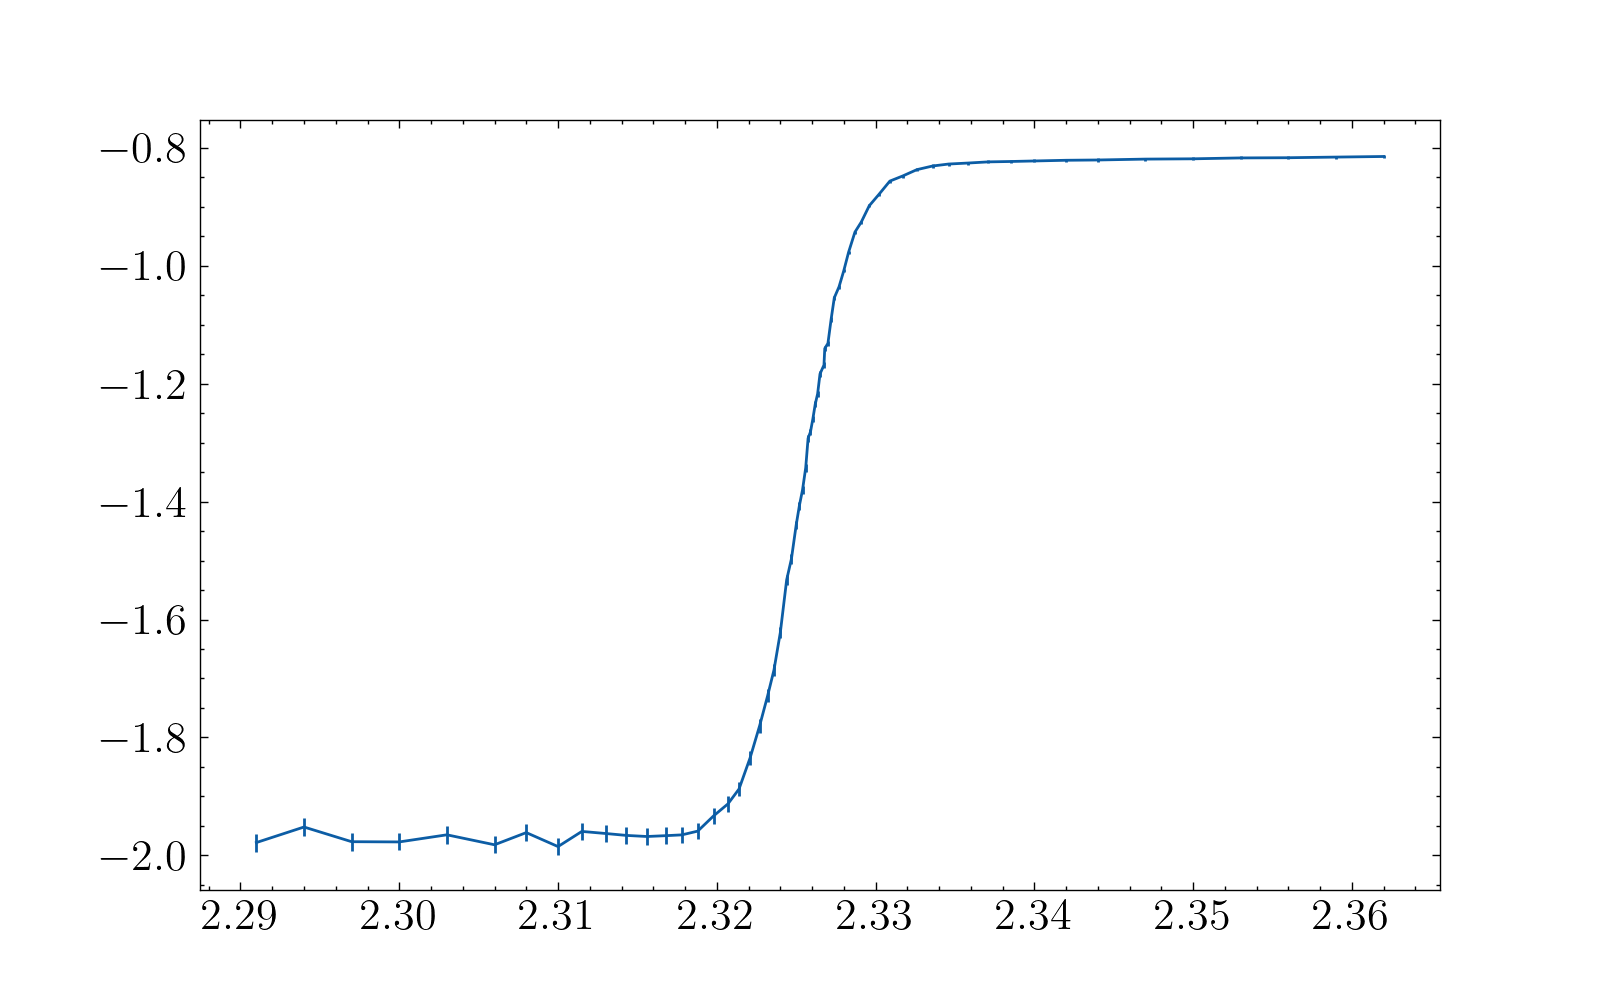

<IPython.core.display.Javascript object>


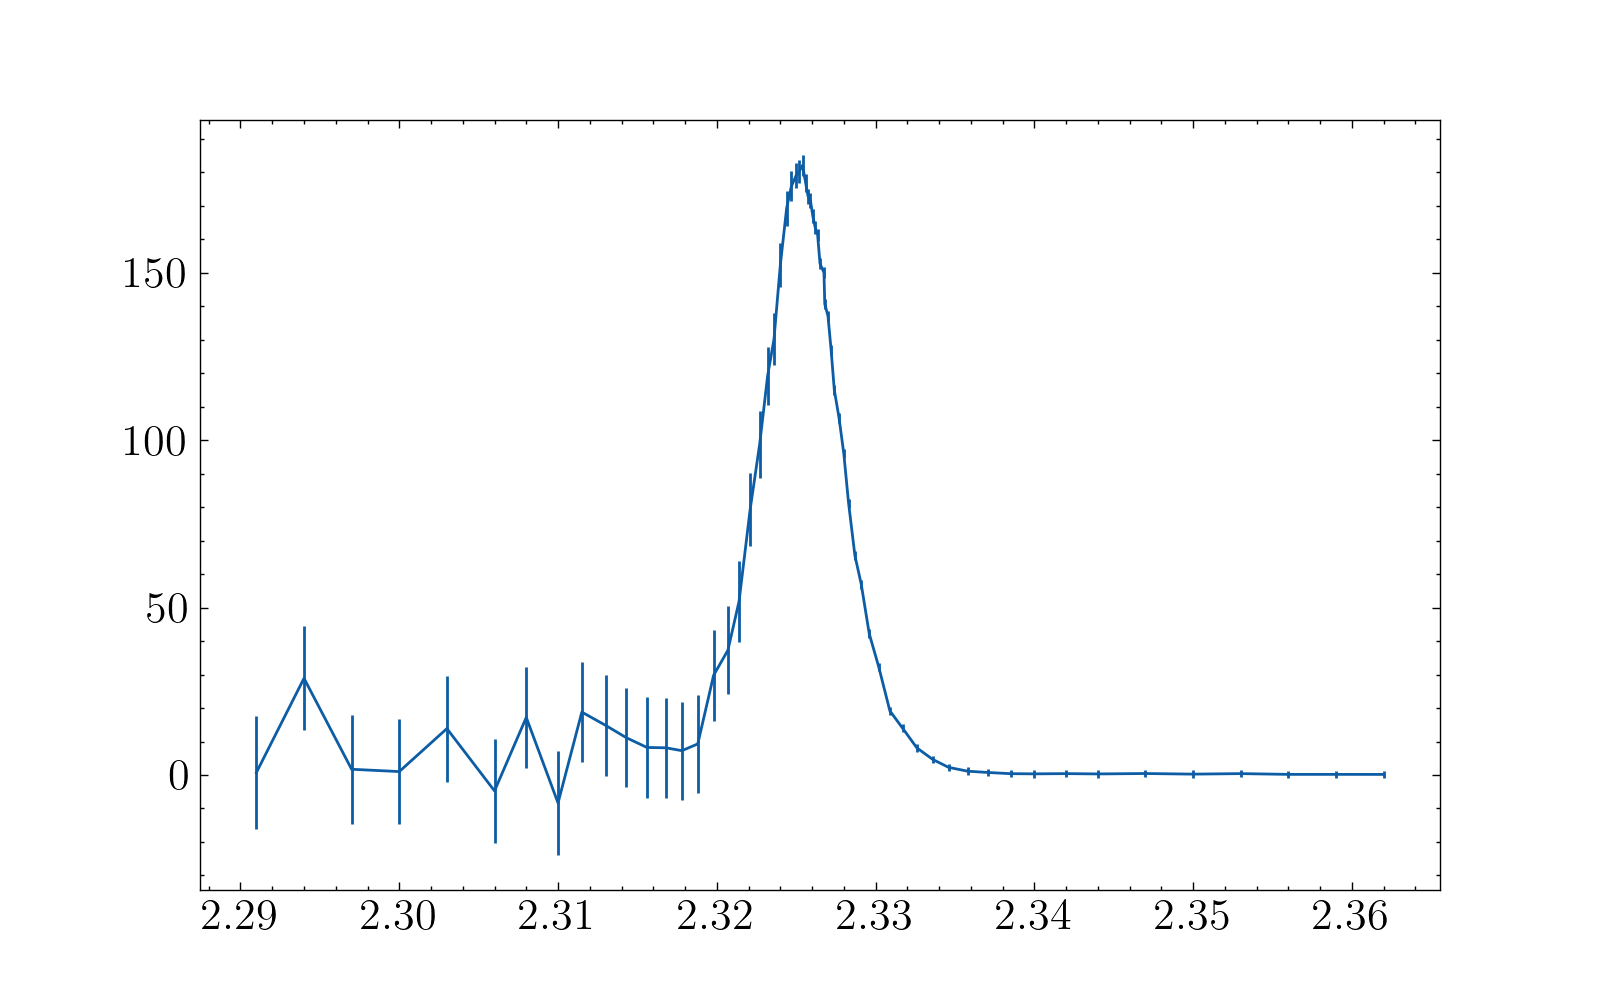

In [7]:
	#Calculating the variance(and uncertainty) from JackKnife averages of energy; This can be used for plot C_v(T)
	Sig2_E_JK = np.zeros((Npoints,NBJK))
	m_Sig2_E_JK = np.zeros(Npoints)
	VAR_Sig2_E_JK = np.zeros(Npoints)
	Sig2_E_JK = E2_JK - E_JK**2
	for a in range (Npoints):
		m_Sig2_E_JK[a] = np.sum(Sig2_E_JK[a,:]) / NBJK
		VAR_Sig2_E_JK[a]  = np.sum( (Sig2_E_JK[a,:] - m_Sig2_E_JK[a])**2 ) * ( NBJK - 1 ) / NBJK
	y = np.zeros(Npoints)
	dy = np.zeros(Npoints)
	y[:]  = m_Sig2_E_JK[:] * lat_sites / (T[:]**2) 
	dy[:] = np.sqrt(VAR_Sig2_E_JK[:]) * lat_sites / (T[:]**2)  

	plt.figure('E', figsize=(8,5))
	plt.errorbar(T, m_E_JK, np.sqrt(V_E_JK))
	plt.show()
	plt.figure('C_v', figsize=(8,5))
	plt.errorbar(T, y, dy)
	plt.show()

<IPython.core.display.Javascript object>


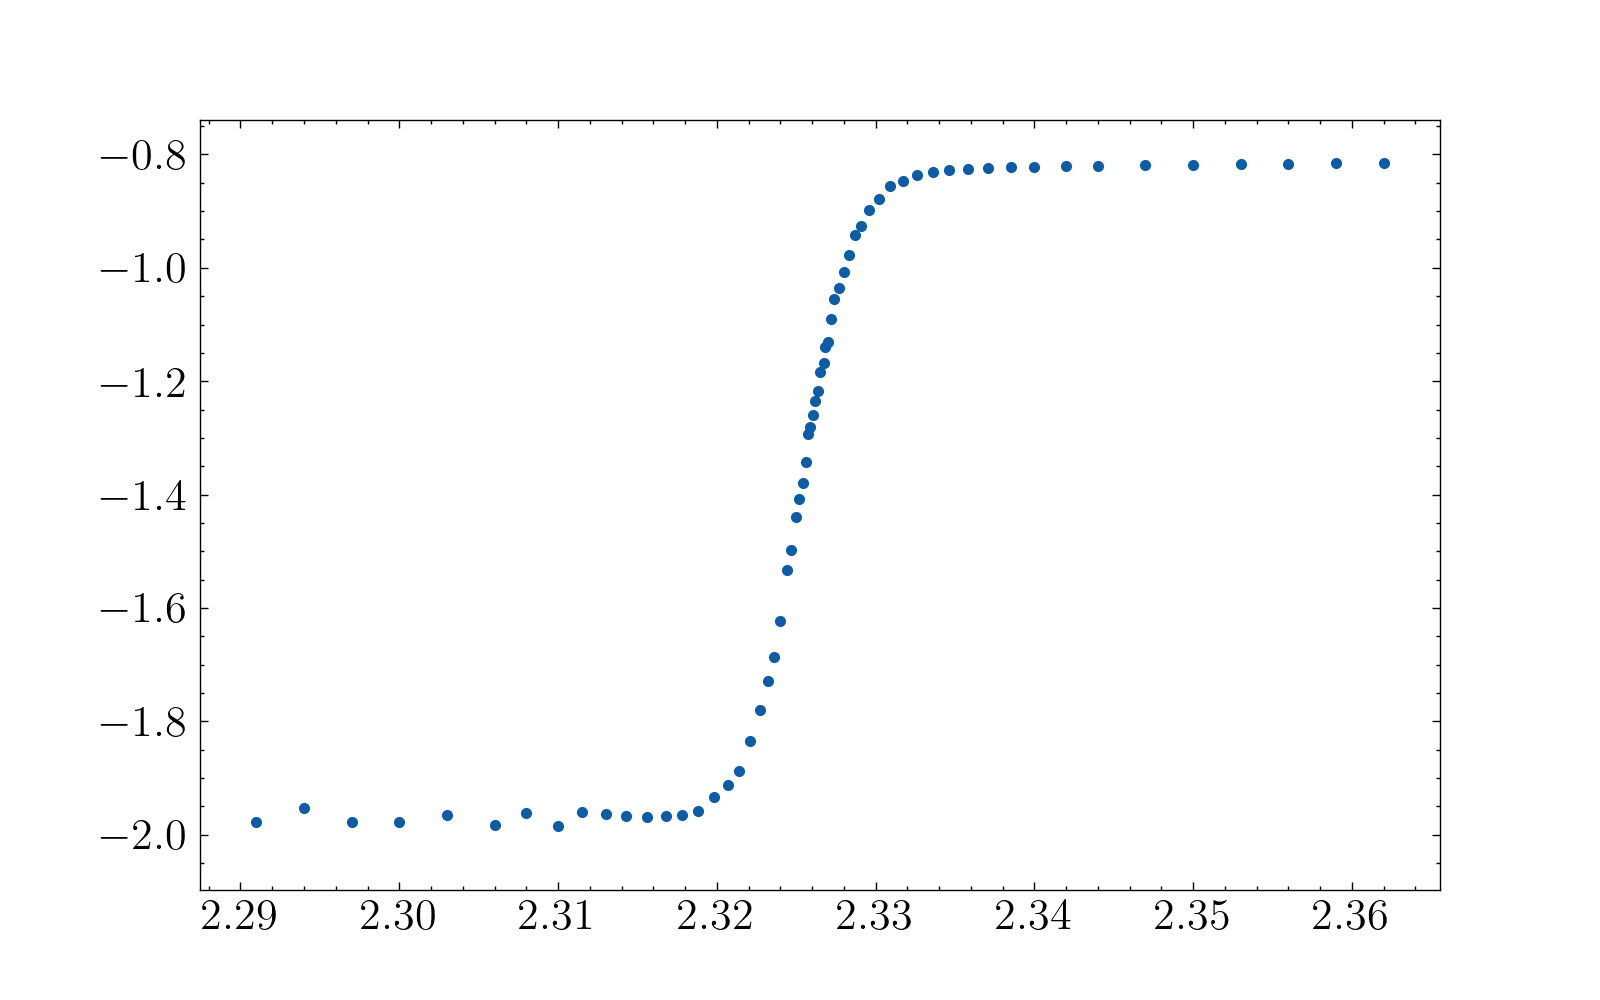

In [8]:
plt.figure('Energy', figsize=(8,5))
E = np.zeros(Npoints)
dE= np.zeros(Npoints)
for q in range(Npoints):
    E[q] = np.float64(f['/simulation/results/%s/Energy/mean/value'%q]) * c[q]
    dE[q] = np.float64(f['/simulation/results/%s/Energy/mean/error'%q]) * c[q]
plt.errorbar(T,E,dE,marker='.', linewidth=0.)
plt.show()

In [9]:
	##Evaluating the JackKnife mean of order parameter (can be generalized to any observable)

	ws = 1    ##window size for Jackknife
	NBJK = np.intc(Nmeas/ws)
	Q_JK = np.zeros((Npoints, NBJK ))
	m_Q = np.zeros(Npoints)
	m_Q_JK = np.zeros(Npoints)

	Q2_JK = np.zeros((Npoints, NBJK ))
	m_Q2 = np.zeros(Npoints)
	m_Q2_JK = np.zeros(Npoints)
    
	m_Q[:]  = np.sum(Q_t[:,:] * w_t[:,:], axis=1)   
	m_Q2[:] = np.sum(Q_t[:,:]**2 * w_t[:,:], axis=1) 
    
	##setting windowsize 20
#	for a in range(NBJK):
#	for b in range(ws):
#		E_JK[:,a]  += - E_t[:,a+b] * w_t[:,a+b]
#		E2_JK[:,a] += - E_t[:,a+b]**2 * w_t[:,a+b]

#	for a in range(Nmeas):
#		E_JK[:,np.intc((a-a%ws)/ws)]  += - E_t[:,a] * w_t[:,a]
#		E2_JK[:,np.intc((a-a%ws)/ws)] += - E_t[:,a]**2 * w_t[:,a]

	for a in range(Npoints):
		Q_JK[a,:]  += - Q_t[a,:] * w_t[a,:]
		Q2_JK[a,:] += - Q_t[a,:]**2 * w_t[a,:]

	for a in range(Npoints):
		Q_JK[a,:]  = ( Q_JK[a,:]  + m_Q[a]  ) * c[a] / (Nmeas - ws)   
		Q2_JK[a,:] = ( Q2_JK[a,:] + m_Q2[a] ) * c[a] / (Nmeas - ws)

	m_Q  = m_Q * c / Nmeas
	m_Q2 = m_Q2 * c / Nmeas
    
	m_Q_JK  = np.sum(Q_JK, axis=1)  /(NBJK)
	m_Q2_JK = np.sum(Q2_JK, axis=1) /(NBJK)
    
##    m_unbiased_E  = Nmeas * m_E  - (Nmeas-1) * m_E_JK
##    m_unbiased_E2 = Nmeas * m_E2 - (Nmeas-1) * m_E2_JK

    
	##The value of the mean and its susceptibility are the same between JackKnife and Binning method
	##Hopefully the uncertainties are better using JackKnife

In [10]:
	# Defining uncertainty of the JK-estimates of E and E^2; This can be used for plot E(T)
    
	V_Q_JK = np.zeros(Npoints)
	V_Q2_JK = np.zeros(Npoints)
#	for b in range(NBJK):
#		V_E_JK[:] += (E_JK[:,b] - m_E_JK[:])**2
#		V_E2_JK[:] += (E2_JK[:,b] - m_E2_JK[:])**2
	


	Temp = Q_JK[:,:] 
	Temp2 = Q2_JK[:,:]
	for b in range(NBJK):
		V_Q_JK[:] += (Q_JK[:,b] - m_Q_JK[:])**2
		V_Q2_JK[:] += (Q2_JK[:,b] - m_Q2_JK[:])**2
	V_Q_JK  = V_Q_JK  *( NBJK - 1 ) / NBJK
	V_Q2_JK = V_Q2_JK *( NBJK - 1 ) / NBJK


<IPython.core.display.Javascript object>


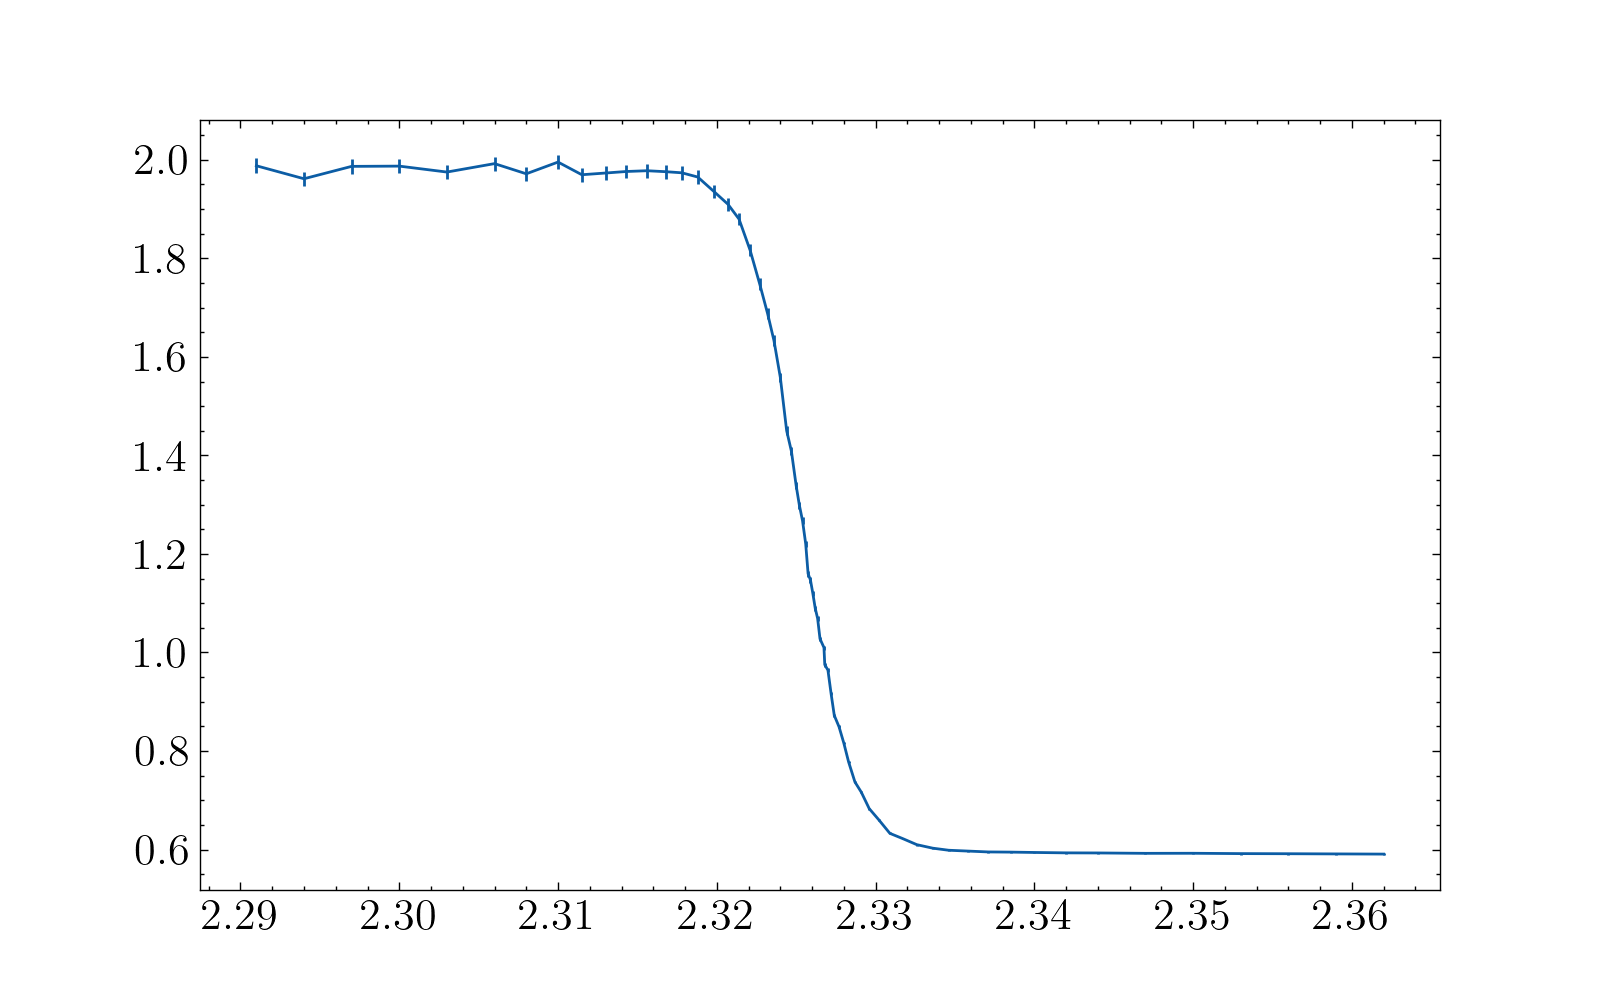

<IPython.core.display.Javascript object>


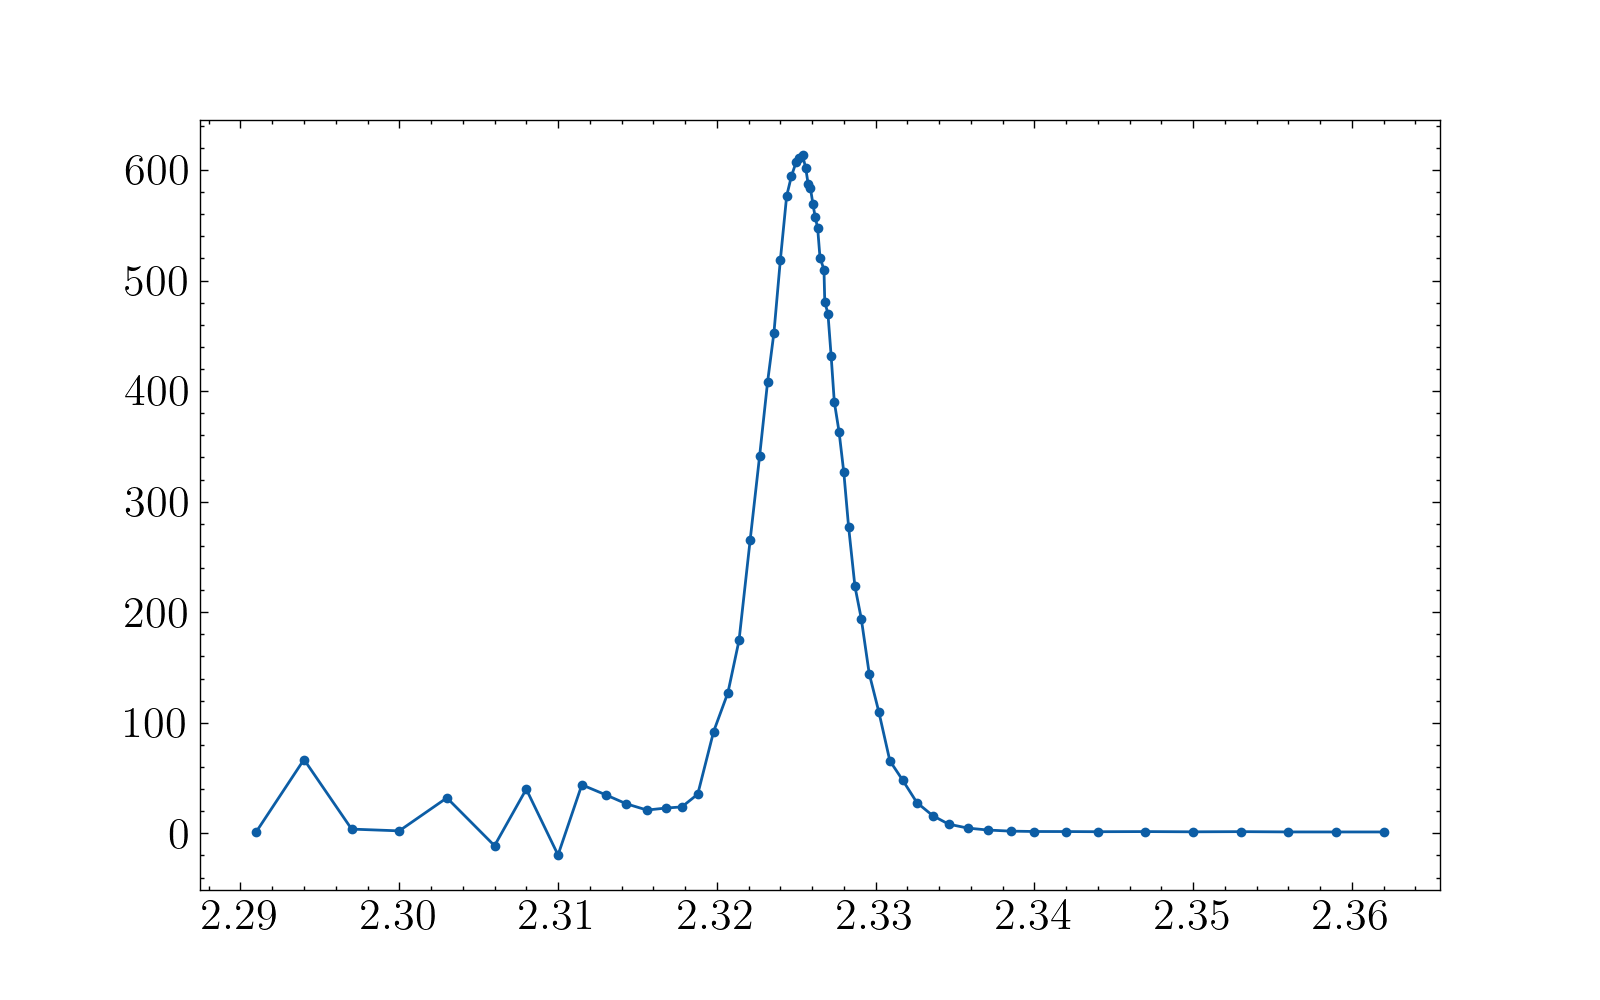

In [11]:
	#Calculating the variance(and uncertainty) from JackKnife averages of energy; This can be used for plot C_v(T)
	Sig2_Q_JK = np.zeros((Npoints,NBJK))
	m_Sig2_Q_JK = np.zeros(Npoints)
	VAR_Sig2_Q_JK = np.zeros(Npoints)
	Sig2_Q_JK = Q2_JK - Q_JK**2
	for a in range (Npoints):
		m_Sig2_Q_JK[a] = np.sum(Sig2_Q_JK[a,:]) / NBJK
		VAR_Sig2_Q_JK[a]  = np.sum( (Sig2_Q_JK[a,:] - m_Sig2_Q_JK[a])**2 ) * ( NBJK - 1 ) / NBJK
	y = np.zeros(Npoints)
	dy = np.zeros(Npoints)
	y[:]  = m_Sig2_Q_JK[:] * lat_sites / (T[:]) 
	dy[:] = np.sqrt(VAR_Sig2_Q_JK[:]) * lat_sites / (T[:])  

	plt.figure('Q', figsize=(8,5))
	plt.errorbar(T, m_Q_JK, np.sqrt(V_Q_JK))
	plt.show()
	plt.figure('Q_susc', figsize=(8,5))
	plt.errorbar(T, y, 0, marker = '.', markersize=5)
	plt.show()

<IPython.core.display.Javascript object>


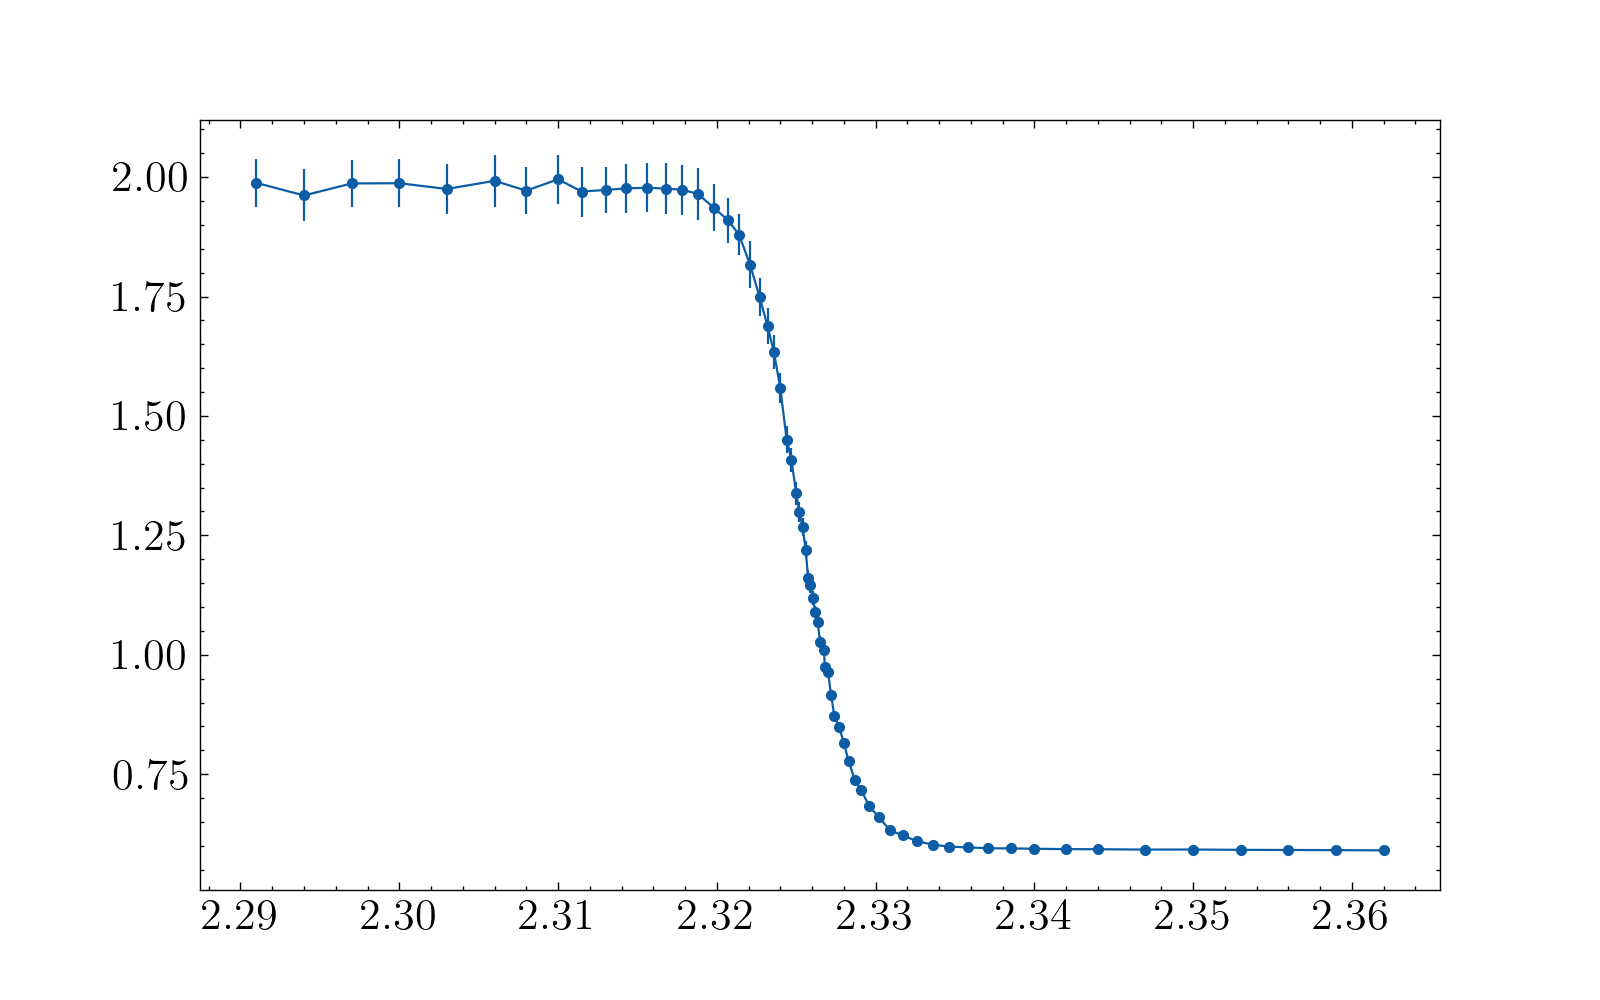

In [12]:
plt.figure('magFM', figsize=(8,5))
m = np.zeros(Npoints)
dm= np.zeros(Npoints)
for q in range(Npoints):
    m[q] = np.float64(f['/simulation/results/%s/Q_x/mean/value'%q]) * c[q]
    dm[q] = np.float64(f['/simulation/results/%s/Q_x/mean/error'%q]) * c[q]
plt.errorbar(T,m,dm,marker='.', linewidth=0.8)
plt.show()